In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from utils import set_pretty_prints, load_dataset

In [2]:
set_pretty_prints()

In [3]:
df = load_dataset('imobiliare.ro')

In [4]:
df

,Unnamed: 0,nr cam,mp,parter,et1-2,et3+,etaj max,typ_decom,bloc nou,Price/Surface,Price,WebPage
0,1,2,56.00,0,1,0,2,1,1,639.29,35800,https://www.imobiliare.ro/vanzare-apartamente/bucuresti/rahova/apartament-de-vanzare-2-camere-XAU700006?lista=2349706&listing=1
1,2,2,57.00,0,1,0,2,0,1,628.07,35800,https://www.imobiliare.ro/vanzare-apartamente/bucuresti/rahova/apartament-de-vanzare-2-camere-XAG00001O?lista=2349706&listing=1
2,3,2,67.00,0,1,0,2,1,1,591.04,39600,https://www.imobiliare.ro/vanzare-apartamente/bucuresti/rahova/apartament-de-vanzare-2-camere-XAG00001K?lista=2349706&listing=1
3,4,1,48.00,0,1,0,2,1,1,620.83,29800,https://www.imobiliare.ro/vanzare-garsoniere/bucuresti/rahova/garsoniera-de-vanzare-XAG00001J?lista=2349706&listing=1
4,5,3,89.60,0,0,1,3,1,1,1260.04,112900,https://www.imobiliare.ro/vanzare-apartamente/bucuresti/p-ta-presei-libere/apartament-de-vanzare-3-camere-XB0V00003?lista=2349706&listing=1
...,...,...,...,...,...,...,...,...,...,...,...,...
9892,9894,4,90.00,0,0,1,8,0,0,944.44,85000,https://www.imobiliare.ro/vanzare-apartamente/bucuresti/crangasi/apartament-de-vanzare-4-camere-X5LL10023?lista=2349706&listing=1
9893,9895,3,85.00,0,0,1,8,1,0,1588.22,134999,https://www.imobiliare.ro/vanzare-apartamente/bucuresti/central/apartament-de-vanzare-3-camere-X9I6100JP?lista=2349706&listing=1
9894,9896,2,48.00,0,0,1,4,0,0,1229.17,59000,https://www.imobiliare.ro/vanzare-apartamente/bucuresti/apusului/apartament-de-vanzare-2-camere-XBJG000HP?lista=2349706&listing=1
9895,9897,4,83.81,0,0,1,3,1,1,1312.49,110000,https://www.imobiliare.ro/vanzare-apartamente/bucuresti/theodor-pallady/penthouse-de-vanzare-4-camere-XANO10193?lista=2349706&listing=1


In [5]:
y_sqmp = df["Price/Surface"]
y_price = df['Price']

# TODO: select viable features
START = 1
END = 9
X = df.iloc[:,START:END]


In [6]:
X

,nr cam,mp,parter,et1-2,et3+,etaj max,typ_decom,bloc nou
0,2,56.00,0,1,0,2,1,1
1,2,57.00,0,1,0,2,0,1
2,2,67.00,0,1,0,2,1,1
3,1,48.00,0,1,0,2,1,1
4,3,89.60,0,0,1,3,1,1
...,...,...,...,...,...,...,...,...
9892,4,90.00,0,0,1,8,0,0
9893,3,85.00,0,0,1,8,1,0
9894,2,48.00,0,0,1,4,0,0
9895,4,83.81,0,0,1,3,1,1


In [7]:
y_price

0        35800
1        35800
2        39600
3        29800
4       112900
         ...  
9892     85000
9893    134999
9894     59000
9895    110000
9896     61500
Name: Price, Length: 9897, dtype: int64

## Exploration

Text(0.5, 1.0, 'Distribution of nr of rooms per apartment')

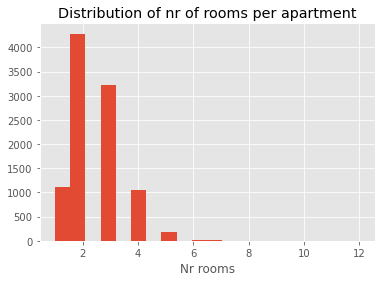

In [8]:
field = 'nr cam'
x_label = 'Nr rooms'
title = 'Distribution of nr of rooms per apartment'
X[field].hist(bins=20)
plt.xlabel(x_label)
plt.title(title)

Text(0.5, 1.0, 'Distribution of sqm per property')

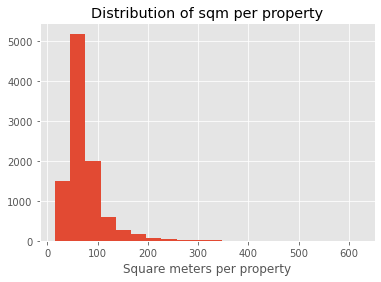

In [9]:
# TODO: Analyse a few more features
field = 'mp'
x_label = 'Square meters per property'
title = 'Distribution of sqm per property'
X[field].hist(bins=20)
plt.xlabel(x_label)
plt.title(title)

Text(0.5, 0, 'Price')

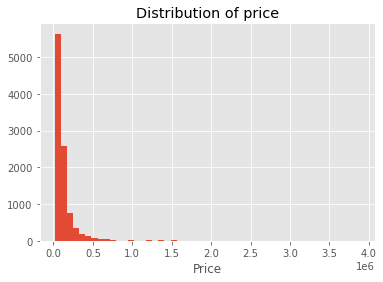

In [10]:
# TODO: Analyse target distribution
target = y_price
title = 'Distribution of price'
x_label = 'Price'
plt.hist(target, bins=50)
plt.title(title)
plt.xlabel(x_label)

Text(0.5, 0, 'Price')

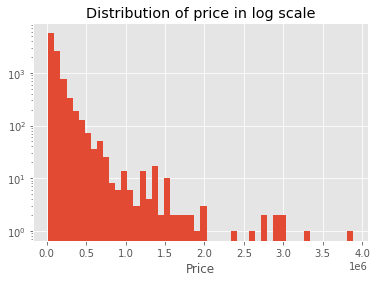

In [11]:
# TODO: Re-display the target distribution
target = y_price
title = "Distribution of price in log scale"
x_label = "Price"
plot_param = 'log'
plot_param_value = True
kwargs = {plot_param : plot_param_value}
plt.hist(target, bins=50, **kwargs)
plt.title(title)
plt.xlabel(x_label)

In [12]:
X.corr()

,nr cam,mp,parter,et1-2,et3+,etaj max,typ_decom,bloc nou
nr cam,1.000000,0.777186,0.003816,-0.067465,0.062328,0.073172,-0.000365,-0.139376
mp,0.777186,1.000000,0.000869,-0.056167,0.053421,0.065719,0.087754,0.006321
parter,0.003816,0.000869,1.000000,-0.285501,-0.388748,-0.448826,0.004277,-0.002453
et1-2,-0.067465,-0.056167,-0.285501,1.000000,-0.772008,-0.500485,0.065535,0.187789
et3+,0.062328,0.053421,-0.388748,-0.772008,1.000000,0.778814,-0.065839,-0.178905
etaj max,0.073172,0.065719,-0.448826,-0.500485,0.778814,1.000000,-0.071077,-0.193046
typ_decom,-0.000365,0.087754,0.004277,0.065535,-0.065839,-0.071077,1.000000,0.213843
bloc nou,-0.139376,0.006321,-0.002453,0.187789,-0.178905,-0.193046,0.213843,1.000000


In [13]:
new_corr_features = ['nr cam', 'mp', 'parter', 'et1-2', 'et3+','etaj max', 'typ_decom', 'bloc nou', 'Price']

In [14]:
df_new = df[new_corr_features]

In [15]:
df_new.corr()

,nr cam,mp,parter,et1-2,et3+,etaj max,typ_decom,bloc nou,Price
nr cam,1.000000,0.777186,0.003816,-0.067465,0.062328,0.073172,-0.000365,-0.139376,0.525333
mp,0.777186,1.000000,0.000869,-0.056167,0.053421,0.065719,0.087754,0.006321,0.770386
parter,0.003816,0.000869,1.000000,-0.285501,-0.388748,-0.448826,0.004277,-0.002453,-0.020806
et1-2,-0.067465,-0.056167,-0.285501,1.000000,-0.772008,-0.500485,0.065535,0.187789,-0.061217
et3+,0.062328,0.053421,-0.388748,-0.772008,1.000000,0.778814,-0.065839,-0.178905,0.072650
etaj max,0.073172,0.065719,-0.448826,-0.500485,0.778814,1.000000,-0.071077,-0.193046,0.091064
typ_decom,-0.000365,0.087754,0.004277,0.065535,-0.065839,-0.071077,1.000000,0.213843,0.034928
bloc nou,-0.139376,0.006321,-0.002453,0.187789,-0.178905,-0.193046,0.213843,1.000000,0.035021
Price,0.525333,0.770386,-0.020806,-0.061217,0.072650,0.091064,0.034928,0.035021,1.000000


## Modelling
- further process X data maybe
- construct normal eq and determine model coefs `(((XtX)^-1)Xt)y (y = x*w => w = y/x)`
- validate results (how, when)

`f(X) = y = X[0]*w[0] + X[1]*w[1] + .... X[N]*w[N] +X[N+1]*w[N+1] | X[N+1] == 1`

In [16]:
X.mean()

nr cam        2.505709
mp           73.704865
parter        0.125695
et1-2         0.361827
et3+          0.512479
etaj max      3.336466
typ_decom     0.717591
bloc nou      0.593210
dtype: float64

In [17]:
X.min()

nr cam        1.0
mp           15.0
parter        0.0
et1-2         0.0
et3+          0.0
etaj max      0.0
typ_decom     0.0
bloc nou      0.0
dtype: float64

In [18]:
X.std()

nr cam        0.950467
mp           40.174869
parter        0.331522
et1-2         0.480553
et3+          0.499870
etaj max      2.818757
typ_decom     0.450194
bloc nou      0.491260
dtype: float64

In [19]:
X.max()

nr cam        12.0
mp           621.0
parter         1.0
et1-2          1.0
et3+           1.0
etaj max      18.0
typ_decom      1.0
bloc nou       1.0
dtype: float64

In [20]:
np_X = X.values

In [21]:
np_X[:20]

array([[  2.  ,  56.  ,   0.  ,   1.  ,   0.  ,   2.  ,   1.  ,   1.  ],
       [  2.  ,  57.  ,   0.  ,   1.  ,   0.  ,   2.  ,   0.  ,   1.  ],
       [  2.  ,  67.  ,   0.  ,   1.  ,   0.  ,   2.  ,   1.  ,   1.  ],
       [  1.  ,  48.  ,   0.  ,   1.  ,   0.  ,   2.  ,   1.  ,   1.  ],
       [  3.  ,  89.6 ,   0.  ,   0.  ,   1.  ,   3.  ,   1.  ,   1.  ],
       [  2.  ,  65.  ,   0.  ,   1.  ,   0.  ,   2.  ,   1.  ,   1.  ],
       [  2.  ,  46.  ,   0.  ,   0.  ,   1.  ,   4.  ,   1.  ,   1.  ],
       [  6.  , 334.  ,   0.  ,   0.  ,   1.  ,  10.  ,   1.  ,   1.  ],
       [  3.  , 104.26,   0.  ,   0.  ,   1.  ,  11.  ,   1.  ,   1.  ],
       [  2.  ,  65.  ,   0.  ,   1.  ,   0.  ,   1.  ,   0.  ,   1.  ],
       [  2.  ,  46.  ,   0.  ,   0.  ,   1.  ,   3.  ,   1.  ,   1.  ],
       [  1.  ,  43.02,   1.  ,   0.  ,   0.  ,   0.  ,   1.  ,   1.  ],
       [  3.  ,  80.23,   0.  ,   0.  ,   1.  ,   3.  ,   1.  ,   1.  ],
       [  1.  ,  30.  ,   1.  ,   0.  ,   0.  ,   0

In [22]:
np_X.mean(axis=0)

array([ 2.51, 73.7 ,  0.13,  0.36,  0.51,  3.34,  0.72,  0.59])

In [23]:
np_X_n = (np_X - np_X.mean(0)) / np_X.std(0)

In [24]:
np_X_n[:20]

array([[-0.53, -0.44, -0.38,  1.33, -1.03, -0.47,  0.63,  0.83],
       [-0.53, -0.42, -0.38,  1.33, -1.03, -0.47, -1.59,  0.83],
       [-0.53, -0.17, -0.38,  1.33, -1.03, -0.47,  0.63,  0.83],
       [-1.58, -0.64, -0.38,  1.33, -1.03, -0.47,  0.63,  0.83],
       [ 0.52,  0.4 , -0.38, -0.75,  0.98, -0.12,  0.63,  0.83],
       [-0.53, -0.22, -0.38,  1.33, -1.03, -0.47,  0.63,  0.83],
       [-0.53, -0.69, -0.38, -0.75,  0.98,  0.24,  0.63,  0.83],
       [ 3.68,  6.48, -0.38, -0.75,  0.98,  2.36,  0.63,  0.83],
       [ 0.52,  0.76, -0.38, -0.75,  0.98,  2.72,  0.63,  0.83],
       [-0.53, -0.22, -0.38,  1.33, -1.03, -0.83, -1.59,  0.83],
       [-0.53, -0.69, -0.38, -0.75,  0.98, -0.12,  0.63,  0.83],
       [-1.58, -0.76,  2.64, -0.75, -1.03, -1.18,  0.63,  0.83],
       [ 0.52,  0.16, -0.38, -0.75,  0.98, -0.12,  0.63,  0.83],
       [-1.58, -1.09,  2.64, -0.75, -1.03, -1.18,  0.63,  0.83],
       [-0.53, -0.19, -0.38,  1.33, -1.03, -0.47,  0.63,  0.83],
       [ 1.57,  0.42, -0.

In [25]:
np_y = y_price.values
np_y[:20]

array([  35800,   35800,   39600,   29800,  112900,   37400,   39500, 2350000,  332000,   39900,   39500,   42766,   88253,   26800,   93000,  135000,  115000,   39500,   55192,   69900], dtype=int64)

In [26]:

np_y_n = (np_y - np_y.min()) / (np_y.max() - np_y.min())
np_y_n[:20]

array([0.  , 0.  , 0.01, 0.  , 0.02, 0.01, 0.01, 0.6 , 0.08, 0.01, 0.01, 0.01, 0.02, 0.  , 0.02, 0.03, 0.03, 0.01, 0.01, 0.01])

In [27]:
np_y.min()


18000

In [28]:
np_y.max()

3880000

In [29]:
y_norm_sub = np_y.min()
y_norm_div = np_y.max() - np_y.min()
y_test = np_y_n * y_norm_div + y_norm_sub
y_test[:20]

array([  35800.,   35800.,   39600.,   29800.,  112900.,   37400.,   39500., 2350000.,  332000.,   39900.,   39500.,   42766.,   88253.,   26800.,   93000.,  135000.,  115000.,   39500.,   55192.,   69900.])

In [30]:
# TODO: write normal eq for raw data
np_weights = np.linalg.pinv(np_X.T.dot(np_X)).dot(np_X.T).dot(np_y)

# TODO: write normal eq for normalized data
np_weights_n = np.linalg.pinv(np_X_n.T.dot(np_X_n)).dot(np_X_n.T).dot(np_y_n)


In [31]:
np_weights

array([-35253.17,   4068.76, -77652.97, -77536.51, -76809.97,   2762.81, -18637.49,   7934.74])

In [32]:
np_weights_n

array([-0.01,  0.04, -0.  ,  0.  ,  0.  ,  0.  , -0.  ,  0.  ])

In [33]:
#TODO: calc predictions for raw data model
np_y_preds = np_X.dot(np_weights)

#TODO: calc predictions for normalized data model
np_y_preds_n = np_X_n.dot(np_weights_n)

In [34]:
np_y_preds[:20]

array([  74630.73,   97336.97,  119387.11,   77333.79,  179577.32,  111249.59,   40195.26, 1087562.99,  261327.85,  127124.26,   37432.45,   51429.28,  141453.02,   -1546.01,  116132.1 ,  171701.58,  204724.82,   74630.73,  149873.29,   84551.27])

Text(0.5, 1.0, 'Normed data model predictions')

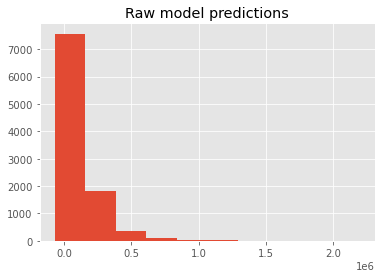

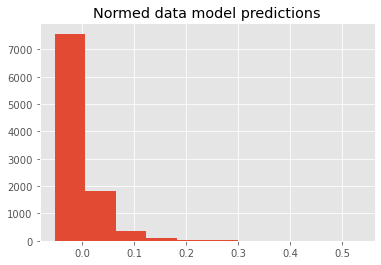

In [35]:
plt.figure()
plt.hist(np_y_preds)
plt.title('Raw model predictions')
plt.figure()
plt.hist(np_y_preds_n)
plt.title('Normed data model predictions')

### One more model before testing results

Lets further improve model by adding bias

In [36]:
ones = np.ones(shape=(np_X_n.shape[0], 1))
ones[:20]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [37]:
np_X_nb = np.concatenate((np_X_n, ones), axis=-1)
np_X_nb[:20]

array([[-0.53, -0.44, -0.38,  1.33, -1.03, -0.47,  0.63,  0.83,  1.  ],
       [-0.53, -0.42, -0.38,  1.33, -1.03, -0.47, -1.59,  0.83,  1.  ],
       [-0.53, -0.17, -0.38,  1.33, -1.03, -0.47,  0.63,  0.83,  1.  ],
       [-1.58, -0.64, -0.38,  1.33, -1.03, -0.47,  0.63,  0.83,  1.  ],
       [ 0.52,  0.4 , -0.38, -0.75,  0.98, -0.12,  0.63,  0.83,  1.  ],
       [-0.53, -0.22, -0.38,  1.33, -1.03, -0.47,  0.63,  0.83,  1.  ],
       [-0.53, -0.69, -0.38, -0.75,  0.98,  0.24,  0.63,  0.83,  1.  ],
       [ 3.68,  6.48, -0.38, -0.75,  0.98,  2.36,  0.63,  0.83,  1.  ],
       [ 0.52,  0.76, -0.38, -0.75,  0.98,  2.72,  0.63,  0.83,  1.  ],
       [-0.53, -0.22, -0.38,  1.33, -1.03, -0.83, -1.59,  0.83,  1.  ],
       [-0.53, -0.69, -0.38, -0.75,  0.98, -0.12,  0.63,  0.83,  1.  ],
       [-1.58, -0.76,  2.64, -0.75, -1.03, -1.18,  0.63,  0.83,  1.  ],
       [ 0.52,  0.16, -0.38, -0.75,  0.98, -0.12,  0.63,  0.83,  1.  ],
       [-1.58, -1.09,  2.64, -0.75, -1.03, -1.18,  0.63,  0.83, 

In [38]:
# TODO: calculate weights
np_weights_nb = np.linalg.inv(np_X_nb.T.dot(np_X_nb) + 0.02 * np.eye(np_X_nb.shape[1])).dot(np_X_nb.T).dot(np_y_n)
np_weights_nb

array([-0.01,  0.04, -0.  , -0.  ,  0.  ,  0.  , -0.  ,  0.  ,  0.03])

In [39]:
# TODO: calculate predictions
np_y_preds_nb = np_X_nb.dot(np_weights_nb)
np_y_preds_nb[:20]

array([ 0.01,  0.02,  0.03,  0.02,  0.04,  0.02,  0.01,  0.28,  0.06,  0.03,  0.01,  0.01,  0.03, -0.01,  0.03,  0.04,  0.05,  0.01,  0.03,  0.02])

(array([  21.,  628., 2177., 3021., 1719.,  772.,  433.,  269.,  199.,  143.,  107.,   98.,   78.,   41.,   35.,   30.,   13.,   27.,   15.,   16.,   11.,   13.,    4.,    2.,    2.,    4.,    2.,    2.,    3.,    0.,    1.,    1.,    2.,    0.,    1.,    0.,    0.,    1.,    1.,    2.,    0.,    0.,    0.,    1.,    0.,    0.,    1.,    0.,    0.,    1.]),
 array([-0.02, -0.01,  0.  ,  0.01,  0.02,  0.04,  0.05,  0.06,  0.07,  0.08,  0.09,  0.11,  0.12,  0.13,  0.14,  0.15,  0.17,  0.18,  0.19,  0.2 ,  0.21,  0.22,  0.24,  0.25,  0.26,  0.27,  0.28,  0.29,  0.31,  0.32,  0.33,  0.34,  0.35,  0.36,  0.38,  0.39,  0.4 ,  0.41,  0.42,  0.43,  0.45,  0.46,  0.47,  0.48,  0.49,  0.5 ,  0.52,  0.53,  0.54,  0.55,  0.56]),
 <BarContainer object of 50 artists>)

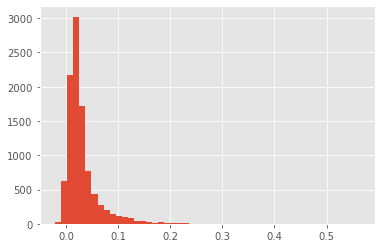

In [40]:
plt.hist(np_y_preds_nb, bins=50)

In [41]:
np_y_pred_price = np_y_preds
np_y_pred_n_price = np_y_preds_n * y_norm_div + y_norm_sub
np_y_pred_nb_price = np_y_preds_nb  * y_norm_div + y_norm_sub

### Now lets prepare some friendly calitative analysis outputs

Raw model

In [42]:
df_result_raw = pd.DataFrame(
    {
        'GOLD' : y_price,
        'PRED' : np_y_pred_price.round(0),
    }
)
df_result_raw.head(10)
df_result_raw.tail(10)

,GOLD,PRED
9887,47000,43077.0
9888,34500,-28459.0
9889,56000,28301.0
9890,101000,139731.0
9891,79524,88871.0
9892,85000,170468.0
9893,134999,166740.0
9894,59000,59036.0
9895,110000,120766.0
9896,61500,30692.0


Normed data model

In [43]:
df_result_n = pd.DataFrame(
    {
        'GOLD' : y_price,
        'PRED' : np_y_pred_n_price.round(0),
    }
)
df_result_n.head(10)
df_result_n.tail(10)

,GOLD,PRED
9887,47000,-73545.0
9888,34500,-145613.0
9889,56000,-88853.0
9890,101000,23109.0
9891,79524,-27751.0
9892,85000,53385.0
9893,134999,49657.0
9894,59000,-58048.0
9895,110000,3683.0
9896,61500,-86391.0


Normed & bias added

In [45]:

df_result_nb = pd.DataFrame(
    {
        'GOLD' : y_price,
        'PRED' : np_y_pred_nb_price.round(0),
    }
)
df_result_nb.head(10)
df_result_nb.tail(10)

,GOLD,PRED
9887,47000,43077.0
9888,34500,-28459.0
9889,56000,28301.0
9890,101000,139730.0
9891,79524,88871.0
9892,85000,170469.0
9893,134999,166740.0
9894,59000,59035.0
9895,110000,120767.0
9896,61500,30692.0


Now lets see some quantitative analysis of the results

In [46]:
# TODO: complete code below
abs_err = np.abs(y_price - np_y_pred_nb_price)
abs_err

0       38830.583013
1       61536.616239
2       79786.689664
3       47532.935938
4       66677.306676
            ...     
9892    85468.921492
9893    31741.189063
9894       35.241695
9895    10767.070957
9896    30808.428334
Name: Price, Length: 9897, dtype: float64

In [47]:
proc_err = abs_err / y_price
proc_err = proc_err * 100

In [48]:
df_result = pd.DataFrame(
    {
        'GOLD' : y_price,
        'PRED' : np_y_pred_nb_price.round(0),
        'ERR%' : proc_err.round(2)
    }
)
df_result.head(20)

,GOLD,PRED,ERR%
0,35800,74631.0,108.47
1,35800,97337.0,171.89
2,39600,119387.0,201.48
3,29800,77333.0,159.51
4,112900,179577.0,59.06
5,37400,111249.0,197.46
6,39500,40195.0,1.76
7,2350000,1087560.0,53.72
8,332000,261327.0,21.29
9,39900,127124.0,218.61


In [49]:
df_result.tail(20)

,GOLD,PRED,ERR%
9877,63000,59587.0,5.42
9878,32900,37951.0,15.35
9879,53490,49445.0,7.56
9880,79000,65299.0,17.34
9881,79900,110933.0,38.84
9882,149000,103314.0,30.66
9883,143000,154443.0,8.00
9884,55000,72155.0,31.19
9885,62860,67189.0,6.89
9886,27500,4096.0,85.11


In [50]:
proc_err.mean()

40.56801916784814

In [62]:
def train_neq(inputs, gold):
    # TODO:
    weights = np.linalg.pinv(inputs.T.dot(inputs)).dot(inputs.T).dot(gold)
    return weights

def evaluate(theta, inputs, gold, y_div, y_sub, name=""):
    _y_pred = inputs.dot(theta)
    _y_vals = _y_pred * y_div + y_sub
    
    _y_true = gold * y_div + y_sub
    
    res_err = np.abs(_y_true - _y_vals)
    prc_err = res_err / _y_true *100
    
    overall = prc_err.mean()
    df_result = pd.DataFrame(
        {
        'GOLD' : _y_true,
        'PRED' : _y_vals.round(0),
        'ERR%' : prc_err.round(2)
        }
    )
    print('Results for', name)
    print(df_result.head(20))
    print(df_result.tail(20))
    print("Overall error: {:.1f}%".format(overall))
    return overall

# Now for a more correct and real-life approach
We will not use the pre-processed data and perform a train-test split. There is no need for train-dev-test split as we do not have a training process to use the dev on.

In [63]:
from sklearn.model_selection import train_test_split
x_trn, x_tst, y_trn, y_tst = train_test_split(np_X_nb, np_y_n, test_size=0.2)

In [64]:
theta = train_neq(
    inputs=x_trn,
    gold=y_trn
)

In [65]:
theta

array([-0.01,  0.04,  0.  ,  0.  ,  0.  ,  0.  , -0.  ,  0.  ,  0.03])

In [66]:
evaluate(
    theta=theta,
    inputs=x_trn,
    gold=y_trn,
    y_div=y_norm_div,
    y_sub=y_norm_sub,
    name='TRAIN',
)

Results for TRAIN
        GOLD      PRED    ERR%
0    45000.0   82472.0   83.27
1   999980.0  631361.0   36.86
2    37700.0   61167.0   62.25
3    55000.0   71306.0   29.65
4    74165.0   93325.0   25.83
5    87000.0  115471.0   32.73
6   152000.0   97526.0   35.84
7    78900.0  129025.0   63.53
8   115000.0   73932.0   35.71
9   105000.0  363487.0  246.18
10  103000.0   94563.0    8.19
11   79500.0    1620.0   97.96
12   34500.0   15796.0   54.21
13  109000.0   85263.0   21.78
14   59000.0    1248.0   97.89
15   63400.0   30629.0   51.69
16  284000.0  126966.0   55.29
17  114835.0  148059.0   28.93
18  141800.0  138672.0    2.21
19  410000.0  525871.0   28.26
          GOLD      PRED    ERR%
7897   75700.0  108082.0   42.78
7898   66000.0  119365.0   80.86
7899   87000.0   23447.0   73.05
7900   62490.0   86571.0   38.54
7901   71000.0   36366.0   48.78
7902  112022.0  130126.0   16.16
7903  106000.0   87692.0   17.27
7904   49490.0  168672.0  240.82
7905  119999.0   67608.0   43.66
7

40.75716160177942

In [67]:
evaluate(
    theta=theta,
    inputs=x_tst,
    gold=y_tst,
    y_div=y_norm_div,
    y_sub=y_norm_sub,
    name='TEST',
)

Results for TEST
        GOLD      PRED    ERR%
0   210000.0  199396.0    5.05
1    68000.0   88119.0   29.59
2   285000.0  547767.0   92.20
3    31900.0   24274.0   23.91
4   135000.0  157198.0   16.44
5    85000.0   74067.0   12.86
6    75000.0   73036.0    2.62
7    92000.0  159133.0   72.97
8    89000.0  123312.0   38.55
9    51000.0   49884.0    2.19
10   63600.0  129111.0  103.01
11   88000.0  108615.0   23.43
12   89000.0   87705.0    1.45
13  220000.0  292616.0   33.01
14   56000.0   21418.0   61.75
15  390000.0  106820.0   72.61
16   85092.0   83077.0    2.37
17  155000.0   33075.0   78.66
18  109500.0  181867.0   66.09
19  159000.0  122156.0   23.17
           GOLD      PRED    ERR%
1960   145000.0  129978.0   10.36
1961   179500.0  110645.0   38.36
1962   215000.0  445750.0  107.33
1963   165000.0  111092.0   32.67
1964    75000.0   35743.0   52.34
1965  2000000.0  770321.0   61.48
1966    50500.0   21189.0   58.04
1967   498000.0  530211.0    6.47
1968    74000.0   71306.0 

40.699128471351386

# Simple Neural model


In [68]:
import torch as th

class SimpleLinerRealEstateModel(th.nn.Module):
    def __init__(self, n_feats, n_hid1=32):
        super().__init__()
        self.hidden1 = th.nn.Linear(n_feats, n_hid1)
        self.act1 = th.nn.ReLU()
        self.readout = th.nn.Linear(n_hid1, 1)
        return
    
    def forward(self, inputs):
        #############################
        # TODO: complete forward pass 
        #############################
        th_x = self.hidden1(inputs)
        th_x = self.act1(th_x)
        th_out = self.readout(th_x)
        return th_out


In [69]:
model = SimpleLinerRealEstateModel(8, 256)
model

SimpleLinerRealEstateModel(
  (hidden1): Linear(in_features=8, out_features=256, bias=True)
  (act1): ReLU()
  (readout): Linear(in_features=256, out_features=1, bias=True)
)

In [70]:
x_trn.shape

(7917, 9)

In [71]:
x_tst.shape

(1980, 9)

### Introducing "dev" dataset
Now we will have a training process so we need a dev dataset

In [72]:
DEV_PRC = 0.5
DEV_SIZE = int(x_tst.shape[0] * DEV_PRC)
x_dev = x_tst[:DEV_SIZE,:]
x_test = x_tst[DEV_SIZE:,:]
x_dev.shape

(990, 9)

Now we tensorize but we eliminate the bias term 

In [74]:

th_x_trn = th.tensor(x_trn[:,:-1], dtype=th.float32)
th_x_dev = th.tensor(x_dev[:,:-1], dtype=th.float32)
th_x_test = th.tensor(x_test[:,:-1], dtype=th.float32)
th_x_trn[:10]

tensor([[-0.5321, -0.4158, -0.3792, -0.7530,  0.9753, -0.1194,  0.6273,  0.8281],
        [ 1.5722,  3.2683, -0.3792,  1.3281, -1.0253, -0.4742, -1.5940,  0.8281],
        [-1.5843, -0.7394, -0.3792,  1.3281, -1.0253, -0.4742,  0.6273,  0.8281],
        [-0.5321, -0.4158,  2.6374, -0.7530, -1.0253, -1.1837,  0.6273,  0.8281],
        [ 0.5201, -0.1084, -0.3792,  1.3281, -1.0253, -0.4742,  0.6273,  0.8281],
        [-0.5321, -0.1918, -0.3792,  1.3281, -1.0253, -0.4742,  0.6273,  0.8281],
        [-0.5321, -0.3411, -0.3792, -0.7530,  0.9753,  0.2354,  0.6273,  0.8281],
        [-0.5321, -0.2416, -0.3792, -0.7530,  0.9753, -0.1194, -1.5940,  0.8281],
        [ 0.5201, -0.2416, -0.3792, -0.7530,  0.9753,  0.5902,  0.6273, -1.2076],
        [ 1.5722,  1.7000, -0.3792,  1.3281, -1.0253, -0.8289, -1.5940, -1.2076]])

In [80]:
th.cuda.get_device_name()

'NVIDIA GeForce RTX 2080 Ti'

In [81]:
th_x_train_slice_gpu = th_x_trn[:10].to(th.device('cuda'))
th_x_train_slice_gpu

tensor([[-0.5321, -0.4158, -0.3792, -0.7530,  0.9753, -0.1194,  0.6273,  0.8281],
        [ 1.5722,  3.2683, -0.3792,  1.3281, -1.0253, -0.4742, -1.5940,  0.8281],
        [-1.5843, -0.7394, -0.3792,  1.3281, -1.0253, -0.4742,  0.6273,  0.8281],
        [-0.5321, -0.4158,  2.6374, -0.7530, -1.0253, -1.1837,  0.6273,  0.8281],
        [ 0.5201, -0.1084, -0.3792,  1.3281, -1.0253, -0.4742,  0.6273,  0.8281],
        [-0.5321, -0.1918, -0.3792,  1.3281, -1.0253, -0.4742,  0.6273,  0.8281],
        [-0.5321, -0.3411, -0.3792, -0.7530,  0.9753,  0.2354,  0.6273,  0.8281],
        [-0.5321, -0.2416, -0.3792, -0.7530,  0.9753, -0.1194, -1.5940,  0.8281],
        [ 0.5201, -0.2416, -0.3792, -0.7530,  0.9753,  0.5902,  0.6273, -1.2076],
        [ 1.5722,  1.7000, -0.3792,  1.3281, -1.0253, -0.8289, -1.5940, -1.2076]],
       device='cuda:0')

In [98]:
y_dev = y_tst[:DEV_SIZE].reshape(-1,1)
y_test = y_tst[DEV_SIZE:].reshape(-1,1)
y_trn = y_trn.reshape(-1,1)
y_trn[:10]

array([[0.01],
       [0.25],
       [0.01],
       [0.01],
       [0.01],
       [0.02],
       [0.03],
       [0.02],
       [0.03],
       [0.02]])

In [99]:
#############################
# TODO: complete y tensors creation 
#############################
th_y_trn = th.tensor(y_trn, dtype=th.float32)
th_y_dev = th.tensor(y_dev, dtype=th.float32)
th_y_test = th.tensor(y_test, dtype=th.float32)
th_y_trn[:20]

tensor([[0.0070],
        [0.2543],
        [0.0051],
        [0.0096],
        [0.0145],
        [0.0179],
        [0.0347],
        [0.0158],
        [0.0251],
        [0.0225],
        [0.0220],
        [0.0159],
        [0.0043],
        [0.0236],
        [0.0106],
        [0.0118],
        [0.0689],
        [0.0251],
        [0.0321],
        [0.1015]])

In [100]:
print(th_y_dev.shape)
print(th_x_dev.shape)
print(th_y_test.shape)
print(th_x_test.shape)

torch.Size([990, 1])
torch.Size([990, 8])
torch.Size([990, 1])
torch.Size([990, 8])


### Model training data feed
Now lets prepare the internal mechanics for data feeding in the model training process

In [101]:
BATCH_SIZE = 16
th_ds = th.utils.data.TensorDataset(th_x_trn, th_y_trn)
th_dl = th.utils.data.DataLoader(th_ds, batch_size=BATCH_SIZE)
th_x_trn.shape

torch.Size([7917, 8])

In [102]:
for th_x_batch, th_y_batch in th_dl:
    break
th_x_batch

tensor([[-0.5321, -0.4158, -0.3792, -0.7530,  0.9753, -0.1194,  0.6273,  0.8281],
        [ 1.5722,  3.2683, -0.3792,  1.3281, -1.0253, -0.4742, -1.5940,  0.8281],
        [-1.5843, -0.7394, -0.3792,  1.3281, -1.0253, -0.4742,  0.6273,  0.8281],
        [-0.5321, -0.4158,  2.6374, -0.7530, -1.0253, -1.1837,  0.6273,  0.8281],
        [ 0.5201, -0.1084, -0.3792,  1.3281, -1.0253, -0.4742,  0.6273,  0.8281],
        [-0.5321, -0.1918, -0.3792,  1.3281, -1.0253, -0.4742,  0.6273,  0.8281],
        [-0.5321, -0.3411, -0.3792, -0.7530,  0.9753,  0.2354,  0.6273,  0.8281],
        [-0.5321, -0.2416, -0.3792, -0.7530,  0.9753, -0.1194, -1.5940,  0.8281],
        [ 0.5201, -0.2416, -0.3792, -0.7530,  0.9753,  0.5902,  0.6273, -1.2076],
        [ 1.5722,  1.7000, -0.3792,  1.3281, -1.0253, -0.8289, -1.5940, -1.2076],
        [ 0.5201, -0.0424, -0.3792,  1.3281, -1.0253, -0.8289,  0.6273, -1.2076],
        [-0.5321, -0.8390,  2.6374, -0.7530, -1.0253, -1.1837,  0.6273,  0.8281],
        [-0.5321

In [103]:
th_x_batch.shape

torch.Size([16, 8])

In [104]:
th_y_batch.shape

torch.Size([16, 1])

In [110]:
th.abs(th.tensor([-1]))

tensor([1])

Re-writing evaluation function

In [111]:

def th_evaluate(m, th_inputs, gold, y_div, y_sub, name="", verbose=False):
    m.eval()
    with th.no_grad():
        #############################
        # TODO: complete yhat generation 
        #############################            
        _y_pred = m(th_inputs)
        
    _y_vals = _y_pred * y_div + y_sub
    
    _y_true = gold * y_div + y_sub
    
    res_err = th.abs(_y_true - _y_vals)
    prc_err = res_err / _y_true * 100
    
    overall = prc_err.mean()
    if verbose:
        df_result = pd.DataFrame(
            {
            'GOLD' : _y_true.cpu().numpy().ravel(),
            'PRED' : _y_vals.cpu().numpy().ravel().round(0),
            'ERR%' : prc_err.cpu().numpy().ravel().round(2)
            }
        )
        print('Results for', name)
        print(df_result.head(20))
        print(df_result.tail(20))    
    m.train()
    return overall

In [112]:
loss_func = th.nn.MSELoss()
# optimizer: weights = weights - alpha * grads # alpha << 1
opt = th.optim.Adam(model.parameters(), lr=5e-5)
opt

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    eps: 1e-08
    foreach: None
    lr: 5e-05
    maximize: False
    weight_decay: 0
)

In [118]:
DEBUG = False
TOTAL_NR_EPOCHS = 100
# re-init model
model = SimpleLinerRealEstateModel(8, 256)
opt = th.optim.Adam(model.parameters(), lr=1e-4)
best_dev_err = 10_000
wait_time = 0
max_nr_of_succesive_fails = 5
for epoch in range(TOTAL_NR_EPOCHS):
    if DEBUG and epoch >0:
        break
    for th_x_batch, th_y_batch in th_dl:
        # compute current inferred values with forward prop
        th_y_hat = model(th_x_batch)
        # compute loss (compare results with actual truth)
        th_loss = loss_func(input=th_y_hat, target=th_y_batch) #((th_y_hat - th_y_batch)**2).mean()
        # nullfy the gradients
        opt.zero_grad()
        # compute loss 1st derv wrt all model weights (grads)
        th_loss.backward()
        
        if DEBUG:
            th_param = next(model.parameters())
            print(th_param.grad)
            break
        
        # apply gradients to weights with a hopefully smart approach
        opt.step()
    if not DEBUG:
        # now we evaluate on TRAIN and DEV to see how good we are
        th_evaluate(
            m=model,
            th_inputs=th_x_trn,
            gold=th_y_trn,
            y_div=y_norm_div,
            y_sub=y_norm_sub,
            verbose=False,
            name='TRAIN @ Epoch {}'.format(epoch)
        )
        dev_err = th_evaluate(
            m=model,
            th_inputs=th_x_dev,
            gold=th_y_dev,
            y_div=y_norm_div,
            y_sub=y_norm_sub,
            verbose=False,
            name='DEV @ Epoch {}'.format(epoch)
        )
        if best_dev_err > dev_err:
            best_dev_err = dev_err
            wait_time = 0
            print("BEST MODEL @ Epoch {}".format(epoch))
        else:
            wait_time += 1
            if wait_time > max_nr_of_succesive_fails:
                print("STOP TRAINING !")
                break

if not DEBUG: 
    # finally we evaluate on TEST
    th_evaluate(
        m=model,
        th_inputs=th_x_test,
        gold=th_y_test,
        y_div=y_norm_div,
        y_sub=y_norm_sub,
        verbose=True,
        name='Final TEST'
    )


BEST MODEL @ Epoch 0
BEST MODEL @ Epoch 1
BEST MODEL @ Epoch 2
BEST MODEL @ Epoch 3
BEST MODEL @ Epoch 4
BEST MODEL @ Epoch 5
BEST MODEL @ Epoch 6
BEST MODEL @ Epoch 7
BEST MODEL @ Epoch 8
BEST MODEL @ Epoch 9
BEST MODEL @ Epoch 10
BEST MODEL @ Epoch 11
BEST MODEL @ Epoch 12
BEST MODEL @ Epoch 13
BEST MODEL @ Epoch 14
BEST MODEL @ Epoch 15
BEST MODEL @ Epoch 16
BEST MODEL @ Epoch 17
BEST MODEL @ Epoch 18
BEST MODEL @ Epoch 19
BEST MODEL @ Epoch 20
BEST MODEL @ Epoch 21
BEST MODEL @ Epoch 22
BEST MODEL @ Epoch 23
BEST MODEL @ Epoch 24
BEST MODEL @ Epoch 25
BEST MODEL @ Epoch 26
BEST MODEL @ Epoch 27
BEST MODEL @ Epoch 28
BEST MODEL @ Epoch 29
BEST MODEL @ Epoch 30
BEST MODEL @ Epoch 31
BEST MODEL @ Epoch 32
BEST MODEL @ Epoch 33
BEST MODEL @ Epoch 34
BEST MODEL @ Epoch 35
BEST MODEL @ Epoch 36
BEST MODEL @ Epoch 37
BEST MODEL @ Epoch 38
BEST MODEL @ Epoch 39
BEST MODEL @ Epoch 40
BEST MODEL @ Epoch 41
BEST MODEL @ Epoch 44
BEST MODEL @ Epoch 46
BEST MODEL @ Epoch 47
BEST MODEL @ Epoch 4

In [117]:
dev_err

tensor(36.3327)

In [119]:
import torch as th

class BetterLinerRealEstateModel(th.nn.Module):
    def __init__(self, n_input_feats, layers=[32], activation=th.nn.ReLU):
        super().__init__()
        self.layers = th.nn.ModuleList()
        n_prev = n_input_feats
        for layer_size in layers:
            hid = th.nn.Linear(n_prev, layer_size)
            act = activation()
            self.layers.append(hid)
            self.layers.append(act)
            n_prev = layer_size
        
        self.readout = th.nn.Linear(n_prev, 1)
        return
    
    def forward(self, inputs):
        th_x = inputs
        for layer in self.layers:
            th_x = layer(th_x)
        th_out = self.readout(th_x)
        return th_out

test_model = BetterLinerRealEstateModel(8, [64, 32, 16], activation=th.nn.Sigmoid)
test_model

BetterLinerRealEstateModel(
  (layers): ModuleList(
    (0): Linear(in_features=8, out_features=64, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=64, out_features=32, bias=True)
    (3): Sigmoid()
    (4): Linear(in_features=32, out_features=16, bias=True)
    (5): Sigmoid()
  )
  (readout): Linear(in_features=16, out_features=1, bias=True)
)

### Even closer to production grade experiments: model factories
Now we prepare a basic model factory

In [121]:
def get_model_and_optimizer(layers, activation, opt_class, lr):
    model = BetterLinerRealEstateModel(8, layers, activation)
    opt = opt_class(model.parameters(), lr=lr)
    return model, opt

#############################
# TODO: create a example model
#############################   
test_model, test_opt = get_model_and_optimizer(layers=[32, 4], activation=th.nn.ReLU, opt_class=th.optim.SGD, lr=0.01)
test_model

BetterLinerRealEstateModel(
  (layers): ModuleList(
    (0): Linear(in_features=8, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=4, bias=True)
    (3): ReLU()
  )
  (readout): Linear(in_features=4, out_features=1, bias=True)
)

### Grid search
Next step is grid searching

In [123]:
#############################
# TODO: complete missing grid search params
############################# 

dct_grid_space = {
    'layers' : [
        [256],
        [64],
        [64, 16],
        [128, 32, 8],
    ],
    'activation' : [
        th.nn.ReLU,
        th.nn.SELU,
    ],
    'opt_class' : [
        th.optim.SGD,
        th.optim.Adam
    ],
    'lr' : [
        0.001,
        0.01,
    ]
}

In [124]:
loss_func = th.nn.MSELoss()
dct_grid_space

{'layers': [[256], [64], [64, 16], [128, 32, 8]],
 'activation': [torch.nn.modules.activation.ReLU,
  torch.nn.modules.activation.SELU],
 'opt_class': [torch.optim.sgd.SGD, torch.optim.adam.Adam],
 'lr': [0.001, 0.01]}

In [ ]:
def train_model(model, opt, max_epochs=TOTAL_NR_EPOCHS):
    best_dev_err = 100
    wait_time = 0
    max_nr_of_succesive_fails = 2
    for epoch in range(max_epochs):
        for th_x_batch, th_y_batch in th_dl:
            # TODO: compute current inferred values with forward prop
            th_y_hat = None
            # compute loss (compare results with actual truth)
            th_loss = loss_func(input=th_y_hat, target=th_y_batch) #((th_y_hat - th_y_batch)**2).mean()
            # TODO: nullfy the gradients
            opt.zero_grad()
            # TODO: compute loss 1st derv wrt all model weights (grads)
            th_loss.backward()
            # TODO: apply gradients to weights with a hopefully smart approach
            opt.step()
            
        # now we evaluate on TRAIN and DEV to see how good we are
        dev_err = th_evaluate(
            m=model,
            th_inputs=th_x_dev,
            gold=y_dev,
            y_div=y_norm_div,
            y_sub=y_norm_sub,
            verbose=False,
            name='DEV @ Epoch {}'.format(epoch)
        )
        if best_dev_err > dev_err:
            best_dev_err = dev_err
            wait_time = 0
            print("\rBEST MODEL @ Epoch {}\r".format(epoch), end='', flush=True)
        else:
            wait_time += 1
            if wait_time > max_nr_of_succesive_fails:
                print("\nSTOP TRAINING !")
                break
    return model

### Grid pre-processing



Prepare grid in a friendly format

In [125]:
grid_params = []
grid_values = []
for k in dct_grid_space:
    grid_params.append(k)
    grid_values.append(dct_grid_space[k])
import itertools
grid_combs = list(itertools.product(*grid_values))

In [126]:
grid_params

['layers', 'activation', 'opt_class', 'lr']

In [127]:
grid_combs

[([256], torch.nn.modules.activation.ReLU, torch.optim.sgd.SGD, 0.001),
 ([256], torch.nn.modules.activation.ReLU, torch.optim.sgd.SGD, 0.01),
 ([256], torch.nn.modules.activation.ReLU, torch.optim.adam.Adam, 0.001),
 ([256], torch.nn.modules.activation.ReLU, torch.optim.adam.Adam, 0.01),
 ([256], torch.nn.modules.activation.SELU, torch.optim.sgd.SGD, 0.001),
 ([256], torch.nn.modules.activation.SELU, torch.optim.sgd.SGD, 0.01),
 ([256], torch.nn.modules.activation.SELU, torch.optim.adam.Adam, 0.001),
 ([256], torch.nn.modules.activation.SELU, torch.optim.adam.Adam, 0.01),
 ([64], torch.nn.modules.activation.ReLU, torch.optim.sgd.SGD, 0.001),
 ([64], torch.nn.modules.activation.ReLU, torch.optim.sgd.SGD, 0.01),
 ([64], torch.nn.modules.activation.ReLU, torch.optim.adam.Adam, 0.001),
 ([64], torch.nn.modules.activation.ReLU, torch.optim.adam.Adam, 0.01),
 ([64], torch.nn.modules.activation.SELU, torch.optim.sgd.SGD, 0.001),
 ([64], torch.nn.modules.activation.SELU, torch.optim.sgd.SGD, 

In [128]:
len(grid_combs)

32

Lets see how a actual iteration looks like

In [129]:
for grid_iter in range(len(grid_combs)):
    dct_curr_params = {k:v for k,v in zip(grid_params, grid_combs[grid_iter])}
    break
dct_curr_params

{'layers': [256],
 'activation': torch.nn.modules.activation.ReLU,
 'opt_class': torch.optim.sgd.SGD,
 'lr': 0.001}

In [130]:
model, opt = get_model_and_optimizer(**dct_curr_params)

In [131]:
model

BetterLinerRealEstateModel(
  (layers): ModuleList(
    (0): Linear(in_features=8, out_features=256, bias=True)
    (1): ReLU()
  )
  (readout): Linear(in_features=256, out_features=1, bias=True)
)

In [132]:
opt

SGD (
Parameter Group 0
    dampening: 0
    foreach: None
    lr: 0.001
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [ ]:
dct_res = {
    'MODEL' : [],
    'DEV' : [],
    'TEST' : [],
}

In [ ]:
# prepare grid search
grid_params = []
grid_values = []
for k in dct_grid_space:
    grid_params.append(k)
    grid_values.append(dct_grid_space[k])
import itertools
grid_combs = list(itertools.product(*grid_values))

for grid_iter in range(len(grid_combs)):
    dct_curr_params = {k:v for k,v in zip(grid_params, grid_combs[grid_iter])}
    break

# run grid search
for grid_iter in range(len(grid_combs)):
    dct_curr_params = {k:v for k,v in zip(grid_params, grid_combs[grid_iter])}
    print("Running grid search space model #{}/{}".format(grid_iter+1,len(grid_combs)))
    model, opt = get_model_and_optimizer(**dct_curr_params)
    model = train_model(model, opt)
    models.append(model)
    dev_err = th_evaluate(
        m=model,
        th_inputs=th_x_dev,
        gold=y_dev,
        y_div=y_norm_div,
        y_sub=y_norm_sub,
        verbose=False,
        name='Final DEV'
    )
    test_err = th_evaluate(
        m=model,
        th_inputs=th_x_test,
        gold=y_test,
        y_div=y_norm_div,
        y_sub=y_norm_sub,
        verbose=False,
        name='Final TEST'
    )
    dct_res['MODEL'].append('Model #' + str(grid_iter + 1))
    dct_res['DEV'].append(dev_err)
    dct_res['TEST'].append(test_err)
    for k,v in dct_curr_params.items():
        if k not in dct_res:
            dct_res[k] = []
        if not isinstance(v, (list, int, float)):
            dct_res[k].append(v.__name__)
        else:
            dct_res[k].append(v)
    print('Result so far:\n{}'.format(pd.DataFrame(dct_res).sort_values('TEST')))


In [ ]:
# TODO: RUN GRID SEARCH

#### Finally we can now narrow the search